In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from run_script import data_prep

In [2]:
X, y = data_prep('kang')

In [3]:
# sns.set()
methods = ['t-SNE', 'art-SNE', 'ForceAtlas2', 'UMAP', 'TriMap', 'PaCMAP']
X_lows = {}
results = {}
for method in methods:
    X_lows[method] = np.load(f'./output/kang_{method}.npy', allow_pickle=True)[0]
    results[method] = np.load(f'./results/kang_{method}_rteratios.npy', allow_pickle=True)

In [14]:
cell_name = np.load('./data/kang_labels_names.npy', allow_pickle=True)

In [15]:
cell_name

array(['CD14 Mono', 'CD4 Naive T', 'CD4 Memory T', 'CD16 Mono', 'B',
       'CD8 T', 'NK', 'T activated', 'DC', 'B Activated', 'Mk', 'pDC',
       'Eryth'], dtype='<U12')

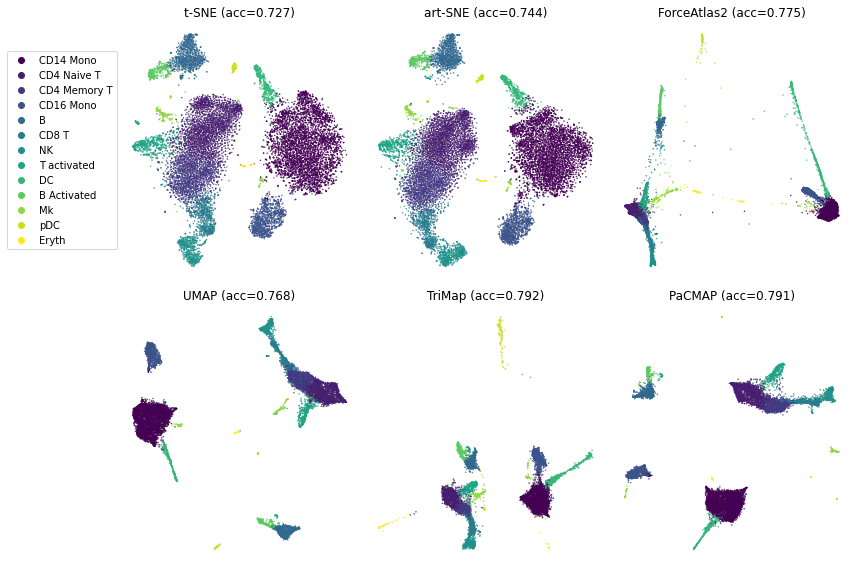

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
for i in range(6):
    method = methods[i]
    if i > 0:
        axes[i].scatter(X_lows[method][:, 0], X_lows[method][:, 1], s=0.2, c=y, cmap="viridis")
        axes[i].set_title(f'{method} (acc={np.mean(results[method]):.3f})')
        axes[i].axis('off')
    else:
        sc = axes[i].scatter(X_lows[method][:, 0], X_lows[method][:, 1], s=0.2, c=y, cmap="viridis")
        axes[i].set_title(f'{method} (acc={np.mean(results[method]):.3f})')
        axes[i].axis('off')
        axes[i].legend(sc.legend_elements()[0], cell_name, bbox_to_anchor=(-0.0,0.5), loc="center right")
plt.tight_layout()
plt.savefig('kang_210707.png', dpi=250)

In [13]:
sc.legend_elements()

([<matplotlib.lines.Line2D at 0x7f6211ba1ba8>,
 ['$\\mathdefault{0}$',
  '$\\mathdefault{1}$',
  '$\\mathdefault{2}$',
  '$\\mathdefault{3}$',
  '$\\mathdefault{4}$',
  '$\\mathdefault{5}$',
  '$\\mathdefault{6}$',
  '$\\mathdefault{7}$',
  '$\\mathdefault{8}$',
  '$\\mathdefault{9}$',
  '$\\mathdefault{10}$',
  '$\\mathdefault{11}$',
  '$\\mathdefault{12}$'])